<a href="https://colab.research.google.com/github/RRSSsantosh-cse/FSM_IITD-AIA_ML/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The provided code snippet performs several steps for preprocessing the data:

It extracts the relevant columns from the dataset. The features are selected from the 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' columns, and they are assigned to the variable `X`. The target variable is selected from the 'charges' column and assigned to the variable `y`.

Next, it converts the categorical variables in `X` to numerical values using one-hot encoding. This is done using the `pd.get_dummies()` function. The resulting encoded features are assigned to the variable `X_encoded`.

The code converts the data from Pandas DataFrame to NumPy arrays. `X_encoded.values` returns the values of `X_encoded` as a NumPy array, and it is assigned back to `X`. Similarly, `y.values` returns the values of `y` as a NumPy array, and it is assigned back to `y`.

 Finally, the code normalizes the feature values in `X` using z-score normalization. It subtracts the mean of `X` along each column (`np.mean(X, axis=0)`) from `X`, and then divides the result by the standard deviation of `X` along each column (`np.std(X, axis=0)`). This ensures that each feature has a mean of 0 and a standard deviation of 1, which can be useful for certain machine learning algorithms.

Overall, the code prepares the dataset by extracting relevant columns, encoding categorical variables, converting the data to NumPy arrays, and normalizing the feature values. These steps are commonly performed to preprocess the data before training a machine learning model.

In [4]:
# Extract the relevant columns from the dataset
path='/content/drive/MyDrive/Machine_Learning/Medical.csv'
dataset = pd.read_csv(path)
dataset
X = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = dataset['charges']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert the data to numpy arrays
X = X_encoded.values
y = y.values

# Normalize the feature values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The provided code snippet performs several steps for preprocessing the data:

 It extracts the relevant columns from the dataset. The features are selected from the 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' columns, and they are assigned to the variable `X`. The target variable is selected from the 'charges' column and assigned to the variable `y`.

Next, it converts the categorical variables in `X` to numerical values using one-hot encoding. This is done using the `pd.get_dummies()` function. The resulting encoded features are assigned to the variable `X_encoded`.

The code converts the data from Pandas DataFrame to NumPy arrays. `X_encoded.values` returns the values of `X_encoded` as a NumPy array, and it is assigned back to `X`. Similarly, `y.values` returns the values of `y` as a NumPy array, and it is assigned back to `y`.

Finally, the code normalizes the feature values in `X` using z-score normalization. It subtracts the mean of `X` along each column (`np.mean(X, axis=0)`) from `X`, and then divides the result by the standard deviation of `X` along each column (`np.std(X, axis=0)`). This ensures that each feature has a mean of 0 and a standard deviation of 1, which can be useful for certain machine learning algorithms.

Overall, the code prepares the dataset by extracting relevant columns, encoding categorical variables, converting the data to NumPy arrays, and normalizing the feature values. These steps are commonly performed to preprocess the data before training a machine learning model.

In [6]:
def linear_regression(x_train, y_train):
    # Add a column of ones to x_train for the bias term
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)
    
    # Calculate the optimal weights using the normal equation
    x_transpose = np.transpose(x_train)
    x_transpose_dot_x = np.dot(x_transpose, x_train)
    x_transpose_dot_y = np.dot(x_transpose, y_train)
    weights = np.dot(np.linalg.inv(x_transpose_dot_x), x_transpose_dot_y)
    
    # Predict the outputs for the training data
    y_pred = np.dot(x_train, weights)
    
    # Plot the actual vs. predicted values
    plt.scatter(x_train[:, 1], y_train, color='blue', label='Actual')
    plt.plot(x_train[:, 1], y_pred, color='red', label='Predicted')
    plt.xlabel('Feature')
    plt.ylabel('Output')
    plt.legend()
    plt.show()
    
    return weights

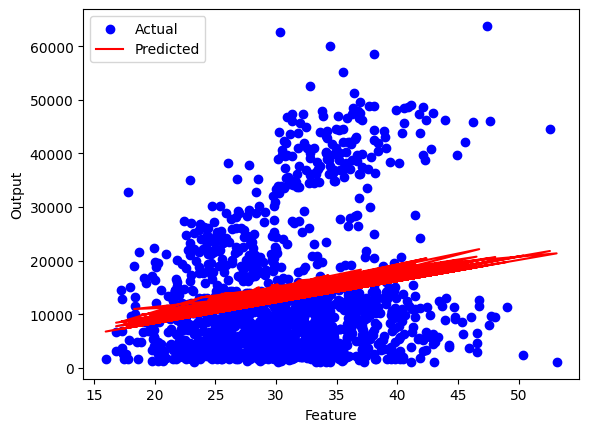

Weights: [523.59949144 392.21400059 657.7746999 ]


In [13]:


# Extract the features (x) and outputs (y)
x_train = dataset[['bmi', 'children']].values
y_train = dataset['charges'].values

# Apply the linear regression algorithm
weights = linear_regression(x_train, y_train)

print("Weights:", weights)